In [7]:
import pandas as pd
import numpy as np
import scanpy as sc
import pickle as pkl
import math
import glob
import os

from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.colors as mcolors

In [25]:
path_data='/om2/user/khrovati/data/cross_system_integration/'
path_names=path_data+'names_parsed/'
path_fig=path_data+'figures/'
path_integration=path_data+'/eval/retina_adult_organoid/'
path_summaries_mueller=path_integration+'integration_summary/mueller_cells/'
path_summaries_amacrine=path_integration+'integration_summary/amacrine_cells/'

In [14]:
# Names
model_map={**pkl.load(open(path_names+'models.pkl','rb')),
           **pkl.load(open(path_names+'models_additional.pkl','rb'))}
param_map=pkl.load(open(path_names+'params.pkl','rb'))
metric_map=pkl.load(open(path_names+'metrics.pkl','rb'))
dataset_map=pkl.load(open(path_names+'datasets.pkl','rb'))
metric_meaning_map=pkl.load(open(path_names+'metric_meanings.pkl','rb'))
metric_map_rev=dict(zip(metric_map.values(),metric_map.keys()))
dataset_map_rev=dict(zip(dataset_map.values(),dataset_map.keys()))
system_map=pkl.load(open(path_names+'systems.pkl','rb'))
params_opt_map=pkl.load(open(path_names+'params_opt_model.pkl','rb'))
params_opt_gene_map=pkl.load(open(path_names+'params_opt_genes.pkl','rb'))
param_opt_vals=pkl.load(open(path_names+'optimized_parameter_values.pkl','rb'))

# cmap
model_cmap=pkl.load(open(path_names+'model_cmap.pkl','rb'))
obs_col_cmap=pkl.load(open(path_names+'obs_col_cmap.pkl','rb'))
metric_background_cmap=pkl.load(open(path_names+'metric_background_cmap.pkl','rb'))

In [ ]:
conditions_map={
    'adult_fovea':'Tissue fovea', 
    'adult_periphery':'Tissue periphery', 
    'organoid':'Organoid'
}

## Mueller cells

In [57]:
# Load embeds and expression
embeds={**pkl.load(open(path_summaries_mueller+'density_topmodels.pkl','rb')), 
       **pkl.load(open(path_summaries_mueller+'density_scgen_example.pkl','rb'))}
adata=sc.read(path_summaries_mueller+'adata_markers.h5ad')

/om2/user/khrovati/miniconda/envs/csi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(
/om2/user/khrovati/miniconda/envs/csi/lib/python3.9/site-packages/scanpy/plotting/_tools/__init__.py:1520: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[density_col_name] = dens_values
/om2/user/khrovati/miniconda/envs/csi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(
/om2/user/khrovati/miniconda/envs/csi/lib/python3.9/site-packages/scanpy/plotting/_tools/__init__.py:1520: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[density_col_name] = dens_values
/om2/user/khrovati/miniconda/envs/csi/lib/pyth

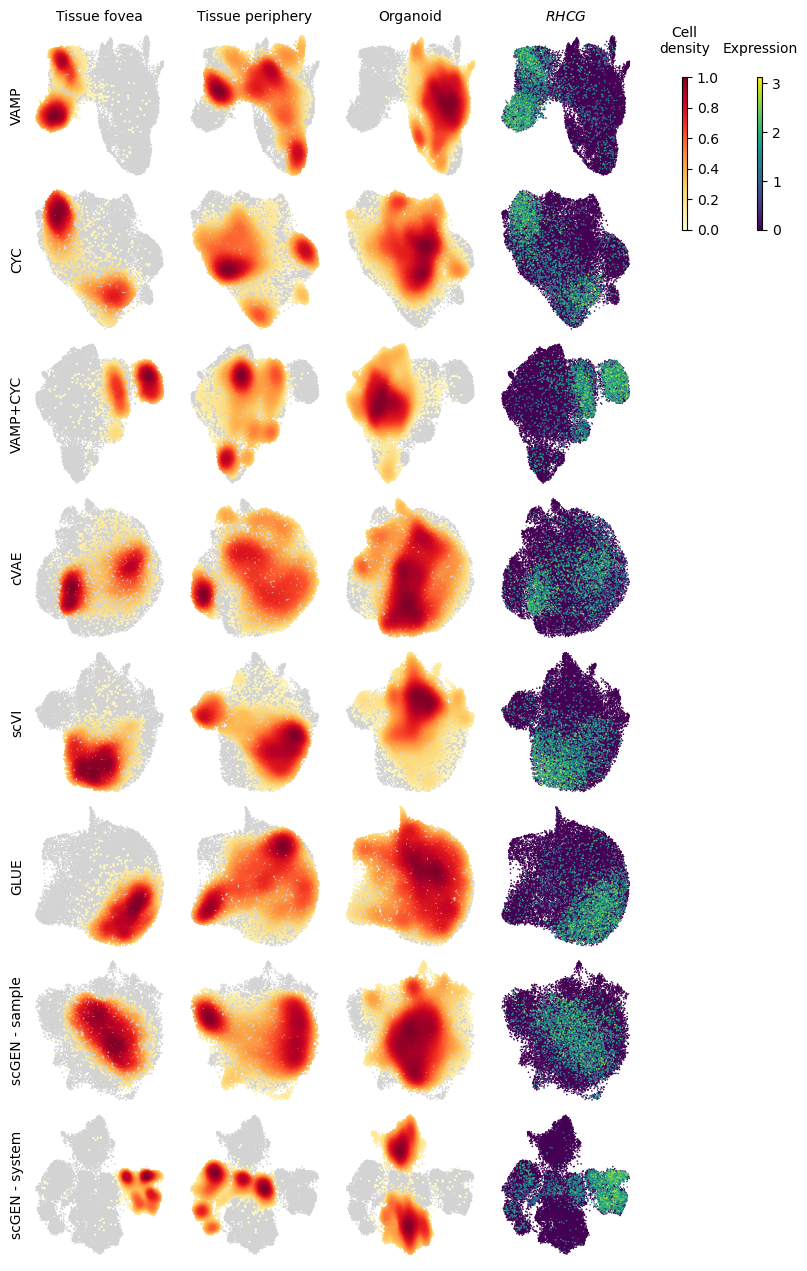

In [58]:
# Density & gene expression UMAPs across models
genes=['RHCG']
cols=list(conditions_map)+genes
ncol=len(cols)
nrow=len(embeds)
fig,axs=plt.subplots(nrow,ncol,figsize=(2*ncol,2*nrow))
cmaps_keep=[]
for i,(model,model_name) in enumerate([(k,v) for k,v in model_map.items() if k in embeds]):
    embed=embeds[model]
    for j,col in enumerate(cols):
        ax=axs[i,j]
        adata.obsm['X_umap']=embed[adata.obs_names,:].obsm['X_umap']
        if col in genes:
            sc.pl.umap( adata,color=col,gene_symbols='feature_name',
                     title='',ax=ax,show=False, frameon=False)
        else:
            sc.pl.umap( embed,ax=ax,show=False, frameon=False)
            sc.pl.embedding_density(
                embed[embed.obs.system_region==col,:],fg_dotsize=10,
                basis='umap', key='umap_density_system_region', title='',
                ax=ax,show=False, frameon=False)
        if j==0:
            ax.axis('on')
            ax.tick_params(
            top='off', bottom='off', left='off', right='off', 
            labelleft='on', labelbottom='off')
            ax.set_ylabel(model_name,fontsize=10)
            ax.set_xlabel('')
            ax.set(frame_on=False)
        if i==0:
            ax.set_title(conditions_map[col] if col in conditions_map else '$\it{'+col+'}$',
                         fontsize=10)
            
        cmaps=[a for a in fig.axes if a.get_label()=='<colorbar>']
        if i==0 and j>=len(conditions_map)-1:
            cmap=cmaps[-1]
            cmaps_keep.append(cmap)
            cmap.set_title('Expression\n' if col in genes else 'Cell\ndensity\n',fontsize=10)
                
        else:
            for cmap in [cmap for cmap in cmaps if cmap not in cmaps_keep]:
                cmap.remove()
plt.subplots_adjust(wspace=0.01,hspace=0.01)
for idx,cmap in enumerate(cmaps_keep):
    adjust=0.25 if idx==0 else 0.15
    pos=cmap.get_position()
    pos.x0 = pos.x0+adjust    
    pos.x1 = pos.x1+adjust
    pos.y1 = pos.y1-0.03  
    pos.y0 = pos.y0-0.03  
    cmap.set_position(pos)

# Save 
plt.savefig(path_fig+'retina_bio_analysis-density_expr-umap.pdf',
            dpi=300,bbox_inches='tight')
plt.savefig(path_fig+'retina_bio_analysis-density_expr-umap.png',
            dpi=300,bbox_inches='tight')

/om2/user/khrovati/miniconda/envs/csi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(
/om2/user/khrovati/miniconda/envs/csi/lib/python3.9/site-packages/scanpy/plotting/_tools/__init__.py:1520: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[density_col_name] = dens_values
/om2/user/khrovati/miniconda/envs/csi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(
/om2/user/khrovati/miniconda/envs/csi/lib/python3.9/site-packages/scanpy/plotting/_tools/__init__.py:1520: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[density_col_name] = dens_values
/om2/user/khrovati/miniconda/envs/csi/lib/pyth

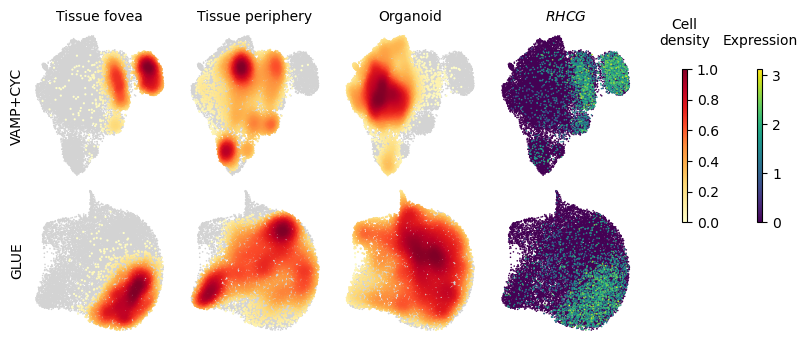

In [60]:
# Subset of models
genes=['RHCG']
cols=list(conditions_map)+genes
ncol=len(cols)
models=['vamp_cycle','scglue']
nrow=len(models)
fig,axs=plt.subplots(nrow,ncol,figsize=(2*ncol,2*nrow))
cmaps_keep=[]
for i,(model,model_name) in enumerate([(k,v) for k,v in model_map.items() if k in models]):
    embed=embeds[model]
    for j,col in enumerate(cols):
        ax=axs[i,j]
        adata.obsm['X_umap']=embed[adata.obs_names,:].obsm['X_umap']
        if col in genes:
            sc.pl.umap( adata,color=col,gene_symbols='feature_name',
                     title='',ax=ax,show=False, frameon=False)
        else:
            sc.pl.umap( embed,ax=ax,show=False, frameon=False)
            sc.pl.embedding_density(
                embed[embed.obs.system_region==col,:],fg_dotsize=10,
                basis='umap', key='umap_density_system_region', title='',
                ax=ax,show=False, frameon=False)
        if j==0:
            ax.axis('on')
            ax.tick_params(
            top='off', bottom='off', left='off', right='off', 
            labelleft='on', labelbottom='off')
            ax.set_ylabel(model_name,fontsize=10)
            ax.set_xlabel('')
            ax.set(frame_on=False)
        if i==0:
            ax.set_title(conditions_map[col] if col in conditions_map else '$\it{'+col+'}$',
                         fontsize=10)
            
        cmaps=[a for a in fig.axes if a.get_label()=='<colorbar>']
        if i==0 and j>=len(conditions_map)-1:
            cmap=cmaps[-1]
            cmaps_keep.append(cmap)
            cmap.set_title('Expression\n' if col in genes else 'Cell\ndensity\n',fontsize=10)
                
        else:
            for cmap in [cmap for cmap in cmaps if cmap not in cmaps_keep]:
                cmap.remove()
plt.subplots_adjust(wspace=0.01,hspace=0.01)
for idx,cmap in enumerate(cmaps_keep):
    adjust=0.25 if idx==0 else 0.15
    pos=cmap.get_position()
    pos.x0 = pos.x0+adjust    
    pos.x1 = pos.x1+adjust
    pos.y1 = pos.y1-0.1 
    pos.y0 = pos.y0-0.1  
    cmap.set_position(pos)

# Save 
plt.savefig(path_fig+'retina_bio_analysis-density_expr_sub-umap.pdf',
            dpi=300,bbox_inches='tight')
plt.savefig(path_fig+'retina_bio_analysis-density_expr_sub-umap.png',
            dpi=300,bbox_inches='tight')

## Amacrine cells

In [63]:
# Load embeds and expression
embeds={'vamp_cycle':pkl.load(open(path_summaries_amacrine+'density_topmodels.pkl','rb'))['vamp_cycle'], 
       **pkl.load(open(path_summaries_amacrine+'density_scgen_example.pkl','rb'))}
adata=sc.read(path_summaries_amacrine+'adata_markers.h5ad')

/om2/user/khrovati/miniconda/envs/csi/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


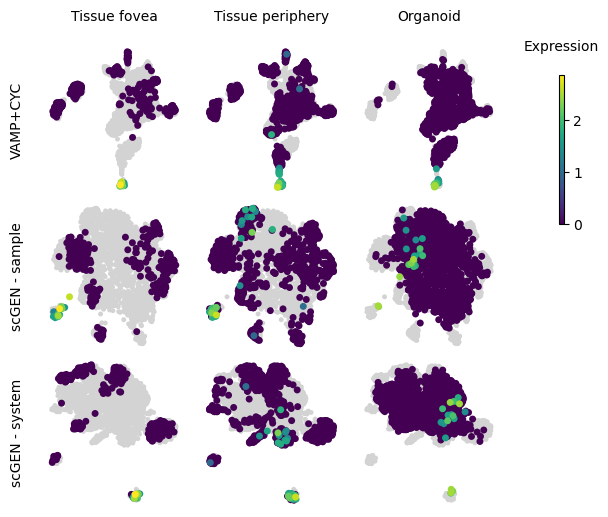

In [66]:
gene='SLC18A3'
eid=adata.var.query('feature_name==@gene').index[0]
vmax=adata[:,eid].X.max()
nrow=len(embeds)
ncol=len(conditions_map)
fig,axs=plt.subplots(nrow,ncol,figsize=(ncol*2, nrow*2))
cmaps_keep=[]
for i,(method,embed) in enumerate(embeds.items()):
    adata.obsm['X_umap']=embed[adata.obs_names,:].obsm['X_umap']
    for j, group in enumerate(conditions_map):
        ax=axs[i,j]
        sc.pl.umap(adata,ax=ax,show=False,frameon=False,s=50)
        adata_group=adata[adata.obs.system_region==group,:].copy()
        adata_group.obsm['X_umap']=embed[adata_group.obs_names,:].obsm['X_umap']
        sc.pl.umap(adata_group,ax=ax,show=False,color=gene,gene_symbols='feature_name',
                   title='',frameon=False,s=100,vmin=0,vmax=adata[:,eid].X.max())
        if i==0:
            ax.set_title(conditions_map[group]+'\n',fontsize=10)
        if j==0:
            ax.axis('on')
            ax.tick_params(
            top='off', bottom='off', left='off', right='off', 
            labelleft='on', labelbottom='off')
            ax.set_ylabel(model_map[method]+'\n',fontsize=10)
            ax.set_xlabel('')
            ax.set(frame_on=False)
        cmaps=[a for a in fig.axes if a.get_label()=='<colorbar>']
        if j==(ncol-1) and i==0:
            cmap=cmaps[-1]
            cmaps_keep.append(cmap)
            cmap.set_title('Expression\n',fontsize=10)
        else:
            for cmap in [cmap for cmap in cmaps if cmap not in cmaps_keep]:
                cmap.remove()
plt.subplots_adjust(wspace=0.05,hspace=0.05)
for idx,cmap in enumerate(cmaps_keep):
    adjust=0.1
    pos=cmap.get_position()
    pos.x0 = pos.x0+adjust    
    pos.x1 = pos.x1+adjust
    pos.y1 = pos.y1-0.05 
    pos.y0 = pos.y0-0.05  
    cmap.set_position(pos)
plt.savefig(path_fig+'retina_bio_analysis-amacrine_expr_subScgen-umap.pdf',
            dpi=300,bbox_inches='tight')
plt.savefig(path_fig+'retina_bio_analysis-amacrine_expr_subScgen-umap.png',
            dpi=300,bbox_inches='tight')